In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad 
from matplotlib.patches import Circle
from matplotlib import cm
import matplotlib.colors

In [ ]:
def Pos(r):
    x = int((r[0]+L0)*h)
    y = int((r[1]+L0)*h) 
    return (x, y)

def V(q, r0, x, y):
    dist = np.hypot(x-r0[0], y-r0[1])
    return q / (4*np.pi*dist*eps)

def E(q, r0, x, y):
    dist = np.hypot(x-r0[0], y-r0[1])**3
    return  q  * (x-r0[0]) / dist / (4*np.pi*eps) ,  q* ( y-r0[1] ) / dist / (4*np.pi*eps)   

In [ ]:
eps = 8.85E-12
N = 200
L = 4
L0 = 2
q = 5
h = N/L

font = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }

In [ ]:
x = np.linspace(-L0, +L0, N)
y = np.linspace(-L0, +L0, N)

cargas = []
rho = np.zeros((N,N))

for i in x:
   for j in y:
     if np.abs( np.max(np.abs( [i,j] )) - 1 ) <= 0.01:
       cargas.append( (q, (i,j)) )

for carga in cargas:
  rho[ Pos(carga[1]) ] = carga[0]

In [ ]:
x = np.linspace(-L0, +L0, N)
y = np.linspace(-L0, +L0, N)

xc = np.cos(np.linspace(0,2*np.pi,N))
yc = np.sin(np.linspace(0,2*np.pi,N))

cargas = []
rho = np.zeros((N,N))

for i in xc:
  for j in yc:
    if abs(i**2 + j**2 - 1) <=0.001:
      cargas.append((q, (i,j)))

for carga in cargas:
  rho[ Pos(carga[1]) ] = carga[0]

In [ ]:
cargas = []
rho = np.zeros((N,N))
cargas.append((q, [0.5, 0]))
cargas.append((-q, [-0.5, 0]))

for carga in cargas:
  rho[ Pos(carga[1]) ] = carga[0]

In [ ]:
x = np.linspace(-L0, +L0, N)
y = np.linspace(-L0, +L0, N)

cargas = []
rho = np.zeros((N,N))

for j in y:
  cargas.append((q, (0,j)))
for j in range(N):
  rho[np.int(N/2)][j] = q 

In [ ]:
print(rho)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


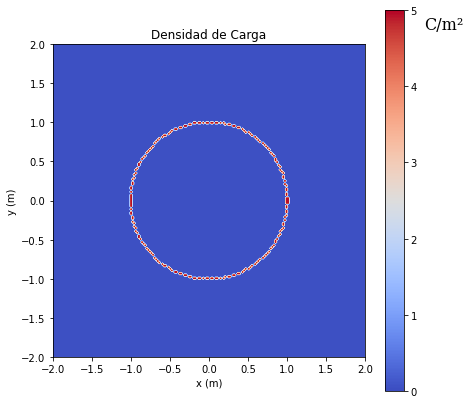

In [ ]:
x = np.linspace(-L0, +L0, N)
y = np.linspace(-L0, +L0, N)

X,Y = np.meshgrid(x,y)

colorinterpolation = 50
colourMap = plt.cm.coolwarm

fig1, ax11 = plt.subplots(1)
fig1.set_size_inches(7,7)

ax11.contourf(x, y, rho.T, colorinterpolation, cmap=colourMap)
ax11.set_title("Densidad de Carga")
ax11.set_xlabel("x (m)")
ax11.set_ylabel("y (m)")
ax11.set_aspect("equal")
fig1.colorbar(cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=float(0), vmax=float(q)), cmap=colourMap))
plt.text(2.75, 2.2, "C/m²", fontdict=font)
fig1.savefig("Densidad de carga_1_exp4")


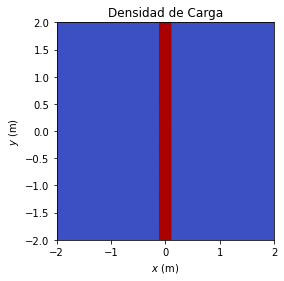

In [ ]:
fig2, a2 = plt.subplots(1)
plt.contourf(x, y , np.transpose(rho), colorinterpolation, cmap=colourMap)
plt.title("Densidad de Carga")
# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cargas:
    a2.add_artist(Circle(pos, 0.1, color=charge_colors[q>0]))
    
a2.set_xlabel('$x$ (m)')
a2.set_ylabel('$y$ (m)')
a2.set_aspect('equal')
fig2.savefig("Densidad de carga_2_exp4")


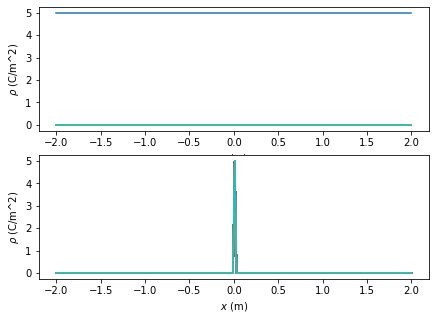

In [ ]:


fig3, (ax31, ax32) = plt.subplots(2, 1)
fig3.set_size_inches(7,5)

ax31.plot(y,np.transpose(rho))
ax31.set_xlabel("$y$ (m)")
ax31.set_ylabel("$\\rho$ (C/m^2)")

ax32.plot(x,rho)
ax32.set_xlabel("$x$ (m)")
ax32.set_ylabel("$\\rho$ (C/m^2)")

fig3.savefig("Densidad de carga_3_exp4")



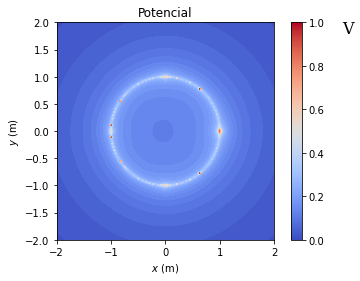

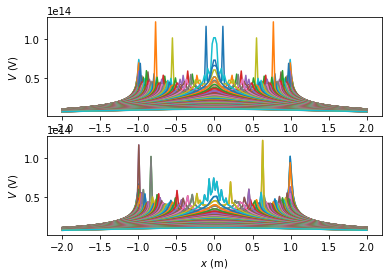

In [ ]:
Vv = np.zeros((N,N))
for carga in cargas:
    v0 = V(*carga, x=X, y=Y)
    Vv += v0

fig4, ax4 = plt.subplots(1)
fig4.colorbar(cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=float(0), vmax=float(1)), cmap=colourMap))
ax4.text(3.25, 1.8, "V",fontdict=font)

# Configure the contour
ax4.contourf(x, y , Vv, colorinterpolation, cmap=colourMap)
ax4.set_title("Potencial")
ax4.set_xlabel('$x$ (m)')
ax4.set_ylabel('$y$ (m)')
ax4.set_aspect('equal')

fig4.savefig("Potencial_1_exp2")


fig5, (ax51, ax52) = plt.subplots(2, 1)

ax51.plot(y,Vv)
ax51.set_xlabel('$y$ (m)')
ax51.set_ylabel('$V$ (V)')

ax52.plot(x,np.transpose(Vv))
ax52.set_xlabel('$x$ (m)')
ax52.set_ylabel('$V$ (V)')

fig5.savefig("Potencial_2_exp2")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


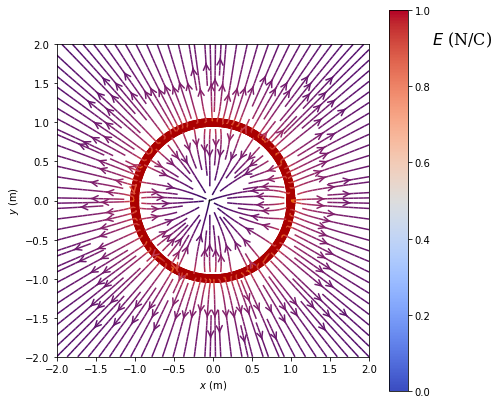

In [ ]:
Ex, Ey = np.zeros((N, N)), np.zeros((N, N))
for carga in cargas:
    ex, ey = E(*carga, x=X, y=Y)
    Ex += ex
    Ey += ey

color= 2 * np.log(np.hypot(Ex, Ey))

fig6 = plt.figure()
fig6.set_size_inches(7,7)
fig6.colorbar(cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=float(0), vmax=float(1)), cmap=colourMap))


ax3 = fig6.add_subplot(111)

ax3.streamplot(x, y, Ex, Ey, color=color, cmap=plt.cm.inferno, density=2, arrowstyle='->', arrowsize=1.5)
    
charge_colors={True: '#aa0000', False: '#0000aa'}
for q, pos in cargas:
    ax3.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))

    
ax3.set_xlabel('$x$ (m)')
ax3.set_ylabel('$y$ (m)')
ax3.set_xlim(-2,2)
ax3.set_ylim(-2,2)
ax3.set_aspect('equal')
plt.text(2.8, 2, "$E$ (N/C)", fontdict=font)

fig6.savefig("Campo_Eléctrico_1_exp2")



In [ ]:
#Definicióón de una norma para matrices

def norm(A):
  mx = A[0][0]
  for fila in range(len(A)):
    for columna in range(len(A[0])):
      if abs(A[fila, columna]) > mx:
        mx = abs(A[fila, columna])
  return mx



10000


In [ ]:
N = 50
h=N/L
eps1 = 0.001
x = np.linspace(-L0, L0, N)
y = np.linspace(-L0, L0, N)
X, Y = np.meshgrid(x,y)

#rho2 = np.zeros((N,N))
#for carga in cargas:
#  rho2[Pos(carga[1])] = carga[0]

#for j in range(N):
#  rho2[np.int(N/2)][j] = q 

Vmatrix_n = np.zeros((N,N))
Vmatrix_n1 = np.zeros((N,N))


for fila in range(1,N-1):
  for columna in range(1,N-1):
    Vmatrix_n1[fila][columna] = (1/4)*(Vmatrix_n[fila + 1][columna] + Vmatrix_n[fila - 1][columna] + 
                                       Vmatrix_n[fila][columna + 1] + Vmatrix_n[fila][columna-1] + 
                                       1*rho[fila][columna])

# [V_n, V_nad] [   ] [   ]
# [V_n] [V_nad] [   ]
# [   ] [V_n, V_nad] [   ]
# [   ] [ ] [V_n] [V_nad] [   ]

while norm(Vmatrix_n1 - Vmatrix_n) > eps1:
  Vmatrix_n = np.copy(Vmatrix_n1)
  for fila in range(1,N-1):
    for columna in range(1,N-1):
      Vmatrix_n1[fila][columna] = (1/4)*(Vmatrix_n[fila + 1][columna] + Vmatrix_n[fila - 1][columna] +
                                       Vmatrix_n[fila][columna + 1] + Vmatrix_n[fila][columna-1] + 
                                       1*rho[fila][columna])



print(np.round(Vmatrix_n1, 4).T)

  

[[ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.     -0.0012 -0.0025 ...  0.0025  0.0012  0.    ]
 [ 0.     -0.0025 -0.005  ...  0.005   0.0025  0.    ]
 ...
 [ 0.     -0.0028 -0.0056 ...  0.0056  0.0028  0.    ]
 [ 0.     -0.0014 -0.0028 ...  0.0028  0.0014  0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]]


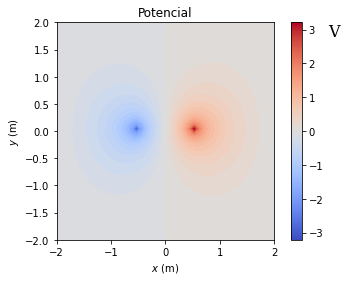

In [ ]:
fig8, ax8 = plt.subplots(1)
fig8.colorbar(cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=float(np.min(Vmatrix_n1)), vmax=float(np.max(Vmatrix_n1))), cmap=colourMap))

# Configure the contour
ax8.contourf(x, y, Vmatrix_n1.T, colorinterpolation, cmap=colourMap)
ax8.set_title("Potencial")
ax8.set_xlabel('$x$ (m)')
ax8.set_ylabel('$y$ (m)')
ax8.set_aspect('equal')
plt.text(3, 1.75, "V", fontdict=font)

fig8.savefig("Potencial_3_exp1")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.98422543e+00 4.97861365e+00 ... 2.01165676e-06
  1.49011612e-07 0.00000000e+00]
 [0.00000000e+00 4.98983721e+00 4.98604333e+00 ... 3.87430191e-06
  2.98023224e-07 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


(-2.0, 2.0)

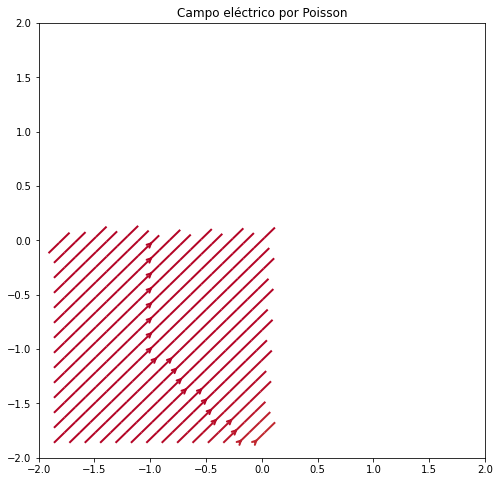

In [ ]:


Ex2, Ey2 = np.zeros((N, N)), np.zeros((N, N)) 
Ex2_new, Ey2_new = np.zeros((N, N)), np.zeros((N, N)) 


for fila in range(1,N-1):
  for columna in range(1,N-1):
    Ex2_new[fila][columna] = (1/2)*(Ex2[fila + 1][columna] + Ex2[fila][columna + 1] + rho2[fila][columna])
    Ey2_new[fila][columna] = (1/2)*(Ey2[fila + 1][columna] + Ey2[fila][columna + 1] + rho2[fila][columna])

while norm(Ex2_new - Ex2) > eps1:
  Ex2, Ey2 = np.copy(Ex2_new), np.copy(Ey2_new)
  for fila in range(1,N-1):
    for columna in range(1,N-1):
      Ex2_new[fila][columna] = (1/2)*(Ex2[fila + 1][columna] + Ex2[fila][columna + 1] + rho2[fila][columna])
      Ey2_new[fila][columna] = (1/2)*(Ey2[fila + 1][columna] + Ey2[fila][columna + 1] + rho2[fila][columna])


color= 2 * np.log(np.hypot(Ex2_new, Ey2_new))

print(Ex2_new)

fig9, ax9 = plt.subplots()
fig9.set_size_inches(8,8)
plt.streamplot(x, y, Ex2_new.T, Ey2_new.T, linewidth=2, color=color, cmap = colourMap, arrowsize=1, arrowstyle='->')
ax9.set_title("Campo eléctrico por Poisson")
ax9.set_xlim((-2,2))
ax9.set_ylim((-2,2))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


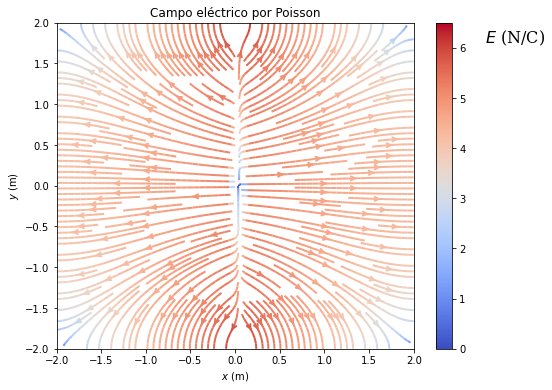

In [ ]:
Ey3, Ex3 = np.gradient(Vmatrix_n1.T)

color = 2 * np.log(np.hypot(Ey3, Ex3)) 

fig9, ax9 = plt.subplots()
fig9.colorbar(cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=float(np.min(np.hypot(Ex3,Ey3))), vmax=float(np.max(np.hypot(Ex3,Ey3)))), cmap=colourMap))

fig9.set_size_inches(8,6)
plt.streamplot(X, Y, -Ex3, -Ey3, linewidth=2, color=color, density=2, cmap = colourMap, arrowsize=1, arrowstyle='->')
ax9.set_title("Campo eléctrico por Poisson")
ax9.set_xlim((-2,2))
ax9.set_ylim((-2,2))
ax9.set_xlabel("$x$ (m)")
ax9.set_ylabel("$y$ (m)")
plt.text(2.8, 1.75, "$E$ (N/C)", fontdict=font)

fig9.savefig("Campo_Eléctrico_2_exp4")


In [ ]:
print(np.round(Ex3, 4))
print(np.round(Ey3, 4))

[[ 0.     -0.0509 -0.0853 -0.0767  0.      0.0767  0.0853  0.0509  0.    ]
 [ 0.     -0.0592 -0.1074 -0.1107  0.      0.1107  0.1074  0.0592  0.    ]
 [ 0.     -0.0791 -0.1745 -0.2595  0.      0.2595  0.1745  0.0791  0.    ]
 [ 0.     -0.0828 -0.2526 -0.753   0.      0.753   0.2526  0.0828  0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.0828  0.2526  0.753   0.     -0.753  -0.2526 -0.0828  0.    ]
 [ 0.      0.0791  0.1745  0.2595  0.     -0.2595 -0.1745 -0.0791  0.    ]
 [ 0.      0.0592  0.1074  0.1107  0.     -0.1107 -0.1074 -0.0592  0.    ]
 [ 0.      0.0509  0.0853  0.0767  0.     -0.0767 -0.0853 -0.0509  0.    ]]
[[ 0.      0.      0.      0.      0.      0.      0.      0.      0.    ]
 [-0.0509 -0.0427 -0.0129  0.0427  0.0767  0.0427 -0.0129 -0.0427 -0.0509]
 [-0.1184 -0.1074 -0.0515  0.1074  0.2215  0.1074 -0.0515 -0.1074 -0.1184]
 [-0.2092 -0.2171 -0.1933  0.2171  0.5958  0.2171 -0.1933 -0.2171 -0.2092]
 [-0.2841 -0.36   -0.721

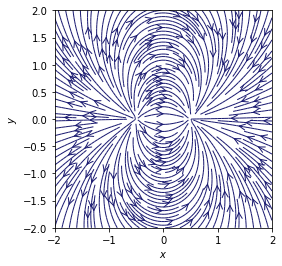

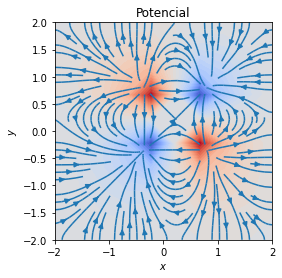

In [ ]:

# Se importan los módulos necesarios para la graficación

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Función que devuelve el campo eléctrico E=(Ex,Ey) de una carga q en r0

def E(q, r0, x, y):

    den = np.hypot(x-r0[0], y-r0[1])**3 #Denominador (distancia entre las cargas y el espacio al cubo)

    return 9*10**9*q * (x -r0[0]) / den, 9*10**9*q * (y - r0[1]) / den

#Puntos de los ejes x e y.

nx, ny = 64, 64
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

#Crear un multipolo con nq cargas

count = 1 #Número de dipolos
nq = 2*int(count) #Número de cargas
charges = [] #Lista de posiciones de las cargas

for i in range(nq):
    q = i%2 * 2 - 1
    #Añadimos vectores de posicinoes iniciales
    charges.append((q, (np.cos(2*np.pi*i/nq)/2, np.sin(2*np.pi*i/nq)/2)))

#Vector de campo eléctrico como componentes separadas (Ex,Ey)

Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx)) #Creamos matriz de ceros
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex #Componente x del campo eléctrico
    Ey += ey #Componente y del campo eléctrico

fig = plt.figure()
ax = fig.add_subplot(111)

#Dibujar las líneas de flujo con mapa de colores y estilos apropiados.

color = 2 * np.log(np.hypot(Ex, Ey))

ax.streamplot(x, y, Ex, Ey, color="midnightblue", linewidth=1, cmap=plt.cm.inferno,

              density=2, arrowstyle='->', arrowsize=1.5)

#Graficar

ax.set_xlabel('$x$')

ax.set_ylabel('$y$')

ax.set_xlim(-2,2)

ax.set_ylim(-2,2)

ax.set_aspect('equal')

plt.show()

import numpy as np
from matplotlib import pyplot as plt


n = 9

#Definimos la función potencial

def V(n, ro, V):
    V1 = V
    cont = 0
    err = V*0+1e-5
    while cont != 3000:
        V = V1
        cont += 1
        for i in range(1, len(V)-1):
            for j in range(1, len(V)-1):
                V1[i, j] = (V[i-1, j] + V[i+1, j] + V[i, j-1] + V[i, j+1] + ro[i, j]*(4/n)**2)/4
    return V1

def ro(q, x0, y0, X, Y, n, V):
    ro = V-V
    cont = 0
    while cont != len(q):
        for i in range(len(X)):
            for j in range(len(Y)):
                if cont == len(q):
                    break
                elif abs(X[0, i]-x0[cont]) <= 4/n and abs(Y[j, 0]-y0[cont]) <= 4/n:
                    ro[i+1, j+1] = q[cont]
                    cont += 1
                else:
                    pass
    return ro


q = [-1, 1, -1, 1]
x0 = [-0.5, 0.5, 0.5, -0.5]
y0 = [-0.5, -0.5, 0.5, 0.5]

x = np.linspace(-2, 2, n+1)
y = np.linspace(-2, 2, n+1)

X, Y = np.meshgrid(x, y)
V0 = np.array([[0.]*(n+1)]*(n+1))

ro = ro(q, x0, y0, X, Y, n, V0)

Vmat = V(n,ro,V0)

fig12, ax12 = plt.subplots(1)

# Configure the contour
ax12.contourf(x, y, Vmat.T, colorinterpolation, cmap=colourMap)
ax12.set_title("Potencial")
ax12.set_xlabel('$x$')
ax12.set_ylabel('$y$')
ax12.set_aspect('equal')

Ey, Ex = np.gradient(V(n, ro, V0))

Ex = Ex*(-1)
Ey = Ey*(-1)

plt.streamplot(X, Y, Ex, Ey)
plt.show()
